**Problem Statement:** To analyze what factors are affecting the churn trend of telecommunication customers.

## DATA UNDERSTANDING

**Data fields**

* state: string. 2-letter code of the US state of customer residence
* account_length: numerical. Number of months the customer has been with the current telco provider
* area_code: string="area_code_AAA" where AAA = 3 digit area code.
* international_plan: (yes/no). The customer has international plan.
* voice_mail_plan: (yes/no). The customer has voice mail plan.
* number_vmail_messages: numerical. Number of voice-mail messages.
* total_day_minutes: numerical. Total minutes of day calls.
* total_day_calls: numerical. Total number of day calls.
* total_day_charge: numerical. Total charge of day calls.
* total_eve_minutes: numerical. Total minutes of evening calls.
* total_eve_calls: numerical. Total number of evening calls.
* total_eve_charge: numerical. Total charge of evening calls.
* total_night_minutes: numerical. Total minutes of night calls.
* total_night_calls: numerical. Total number of night calls.
* total_night_charge: numerical. Total charge of night calls.
* total_intl_minutes: numerical. Total minutes of international calls.
* total_intl_calls: numerical. Total number of international calls.
* total_intl_charge: numerical. Total charge of international calls
* number_customer_service_calls: numerical. Number of calls to customer service
* churn: (yes/no). Customer churn - target variable.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn.objects as so

In [ ]:
df = pd.read_csv('train_cust churn.csv')
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
print('Shape of Dataframe: ', df.shape)

Shape of Dataframe:  (4250, 20)


From the code, we know the dataset has the shape (4250, 20) which means there are 4250 data and 20 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
#After looking in detail, data with object dtype can be categorized into several groups,
#so here the column data type will be converted to categorical.
categorical_data = ['state','area_code','international_plan','voice_mail_plan','churn']

df[categorical_data] = df[categorical_data].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          4250 non-null   category
 1   account_length                 4250 non-null   int64   
 2   area_code                      4250 non-null   category
 3   international_plan             4250 non-null   category
 4   voice_mail_plan                4250 non-null   category
 5   number_vmail_messages          4250 non-null   int64   
 6   total_day_minutes              4250 non-null   float64 
 7   total_day_calls                4250 non-null   int64   
 8   total_day_charge               4250 non-null   float64 
 9   total_eve_minutes              4250 non-null   float64 
 10  total_eve_calls                4250 non-null   int64   
 11  total_eve_charge               4250 non-null   float64 
 12  total_night_minutes            425

In [ ]:
df.describe().round(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00
mean,100.24,7.63,180.26,99.91,30.64,200.17,100.18,17.02,200.53,99.84,9.02,10.26,4.43,2.77,1.56
std,39.70,13.44,54.01,19.85,9.18,50.25,19.91,4.27,50.35,20.09,2.27,2.76,2.46,0.75,1.31
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,73.00,0.00,143.33,87.00,24.36,165.92,87.00,14.10,167.22,86.00,7.52,8.50,3.00,2.30,1.00
50%,100.00,0.00,180.45,100.00,30.68,200.70,100.00,17.06,200.45,100.00,9.02,10.30,4.00,2.78,1.00
75%,127.00,16.00,216.20,113.00,36.75,233.78,114.00,19.87,234.70,113.00,10.56,12.00,6.00,3.24,2.00
max,243.00,52.00,351.50,165.00,59.76,359.30,170.00,30.54,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.24,39.70,1.0,73.00,100.00,127.00,243.00
number_vmail_messages,4250.0,7.63,13.44,0.0,0.00,0.00,16.00,52.00
total_day_minutes,4250.0,180.26,54.01,0.0,143.33,180.45,216.20,351.50
total_day_calls,4250.0,99.91,19.85,0.0,87.00,100.00,113.00,165.00
total_day_charge,4250.0,30.64,9.18,0.0,24.36,30.68,36.75,59.76
total_eve_minutes,4250.0,200.17,50.25,0.0,165.92,200.70,233.78,359.30
total_eve_calls,4250.0,100.18,19.91,0.0,87.00,100.00,114.00,170.00
total_eve_charge,4250.0,17.02,4.27,0.0,14.10,17.06,19.87,30.54
total_night_minutes,4250.0,200.53,50.35,0.0,167.22,200.45,234.70,395.00
total_night_calls,4250.0,99.84,20.09,0.0,86.00,100.00,113.00,175.00


In [ ]:
#Count the number of duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


In [ ]:
# Check for missing values
df.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


In [ ]:
# Assuming your DataFrame is named df
# Select numerical columns
num_cols = df.select_dtypes(include=['int', 'float']).columns

# Create a 5x4 subplot structure
fig = make_subplots(rows=3, cols=5,
                    subplot_titles=[f'{col}' for col in num_cols],
                    vertical_spacing=0.05, horizontal_spacing=0.1)

# Add boxplots to each subplot
for index, col in enumerate(num_cols):
    row = (index // 5) + 1
    col_pos = (index % 5) + 1
    trace = go.Box(
        y=df[col],
        name=col,
        boxmean='sd',  # Show mean and standard deviation
        hoverinfo='y',
        marker=dict(outliercolor='rgba(255, 0, 0, 0.5)',
                    line=dict(outliercolor='rgba(255, 0, 0, 0.5)')),
    )
    fig.add_trace(trace, row=row, col=col_pos)

# Update layout
fig.update_layout(height=1000, width=1500,
                  title_text="Interactive Outlier Check in Numerical Columns With Boxplots",
                  showlegend=False)

# Update x-axes and y-axes labels
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=True)

# Show the figure
fig.show()

The boxplots reveal that most numerical features in the dataset contain outliers, as indicated by the red dots outside the whiskers, particularly in number_vmail_messages and number_customer_service_calls, suggesting significant variability in customer behavior. While some features like total_day_minutes and total_night_minutes display relatively symmetrical distributions, others, such as number_vmail_messages, exhibit right-skewed distributions. The presence of these outliers and varying distributions highlights the importance of further exploration, especially in understanding their potential impact on customer churn.

To solve this outlier problem, I’ll use the IQR method to replace these data points with the median value of the feature.

In [ ]:
# Function to replace outliers with median
def replace_outliers_with_median(df, cols):
    for column in cols:
        # Calculate Q1 (first quartile) and Q3 (third quartile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate the median of the column
        median = df[column].median()

        # Replace outliers with the median
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])

    return df

# Apply the function to the DataFrame
df = replace_outliers_with_median(df, num_cols)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107.0,area_code_415,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,NJ,137.0,area_code_415,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,OH,84.0,area_code_408,yes,no,0.0,299.4,71.0,50.90,200.7,88.0,17.06,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,OK,75.0,area_code_415,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,MA,121.0,area_code_510,no,yes,24.0,218.2,88.0,37.09,200.7,108.0,17.06,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83.0,area_code_415,no,no,0.0,188.3,70.0,32.01,243.8,88.0,20.72,213.7,79.0,9.62,10.3,6.0,2.78,0.0,no
4246,WV,73.0,area_code_408,no,no,0.0,177.9,89.0,30.24,131.2,82.0,11.15,186.2,89.0,8.38,11.5,6.0,3.11,3.0,no
4247,NC,75.0,area_code_408,no,no,0.0,170.7,101.0,29.02,193.1,126.0,16.41,129.1,104.0,5.81,6.9,7.0,1.86,1.0,no
4248,HI,50.0,area_code_408,no,yes,40.0,235.7,127.0,40.07,223.0,126.0,18.96,297.5,116.0,13.39,9.9,5.0,2.67,2.0,no


In [ ]:
# Assuming your DataFrame is named df
# Select numerical columns
num_cols = df.select_dtypes(include=['int', 'float']).columns

# Create a 5x4 subplot structure
fig = make_subplots(rows=3, cols=5,
                    subplot_titles=[f'{col}' for col in num_cols],
                    vertical_spacing=0.03, horizontal_spacing=0.1)

# Add boxplots to each subplot
for index, col in enumerate(num_cols):
    row = (index // 5) + 1
    col_pos = (index % 5) + 1
    trace = go.Box(
        y=df[col],
        name=col,
        boxmean='sd',  # Show mean and standard deviation
        hoverinfo='y',
        marker=dict(outliercolor='rgba(255, 0, 0, 0.5)',
                    line=dict(outliercolor='rgba(255, 0, 0, 0.5)')),
    )
    fig.add_trace(trace, row=row, col=col_pos)

# Update layout
fig.update_layout(height=1000, width=1500,
                  title_text="Interactive Outlier Check in Numerical Columns With Boxplots",
                  showlegend=False)

# Update x-axes and y-axes labels
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=True)

# Show the figure
fig.show()

## Exploratory Data Analysis

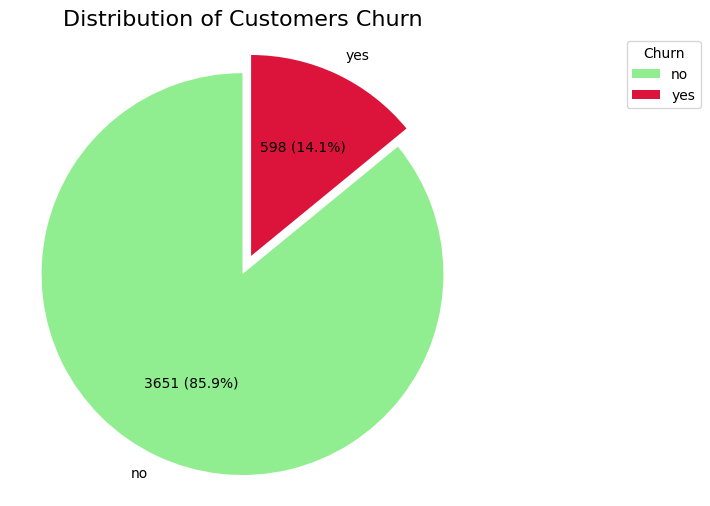

In [ ]:
#Imbalanced Target Variable
# Count the occurrences of each category in the 'churn' column
churn_counts = df['churn'].value_counts()

# Specify the explode values; slightly separate the 'yes' slice
explode = [0, 0.1]  # Adjust these values to change the offset; [no, yes]

# Plot the pie chart
plt.figure(figsize=(6, 6))
colors = ['lightgreen', 'crimson']  # Colors for 'no' and 'yes'

# Create the pie chart with the explode effect
wedges, texts, autotexts = plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct=lambda p: f'{int(p * sum(churn_counts) / 100)} ({p:.1f}%)',
    startangle=90,
    colors=colors,
    explode=explode
)

# Add a legend
plt.legend(wedges, churn_counts.index, title="Churn", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

# Add title
plt.title("Distribution of Customers Churn", fontsize=16)

# Ensure that the pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

The pie chart illustrates the distribution of customer churn in the dataset. This diagram shows that 85.9% of customers (3,651) did not churn, represented by the green segment, while 14.1% of customers (598) churned, represented by the red segment.

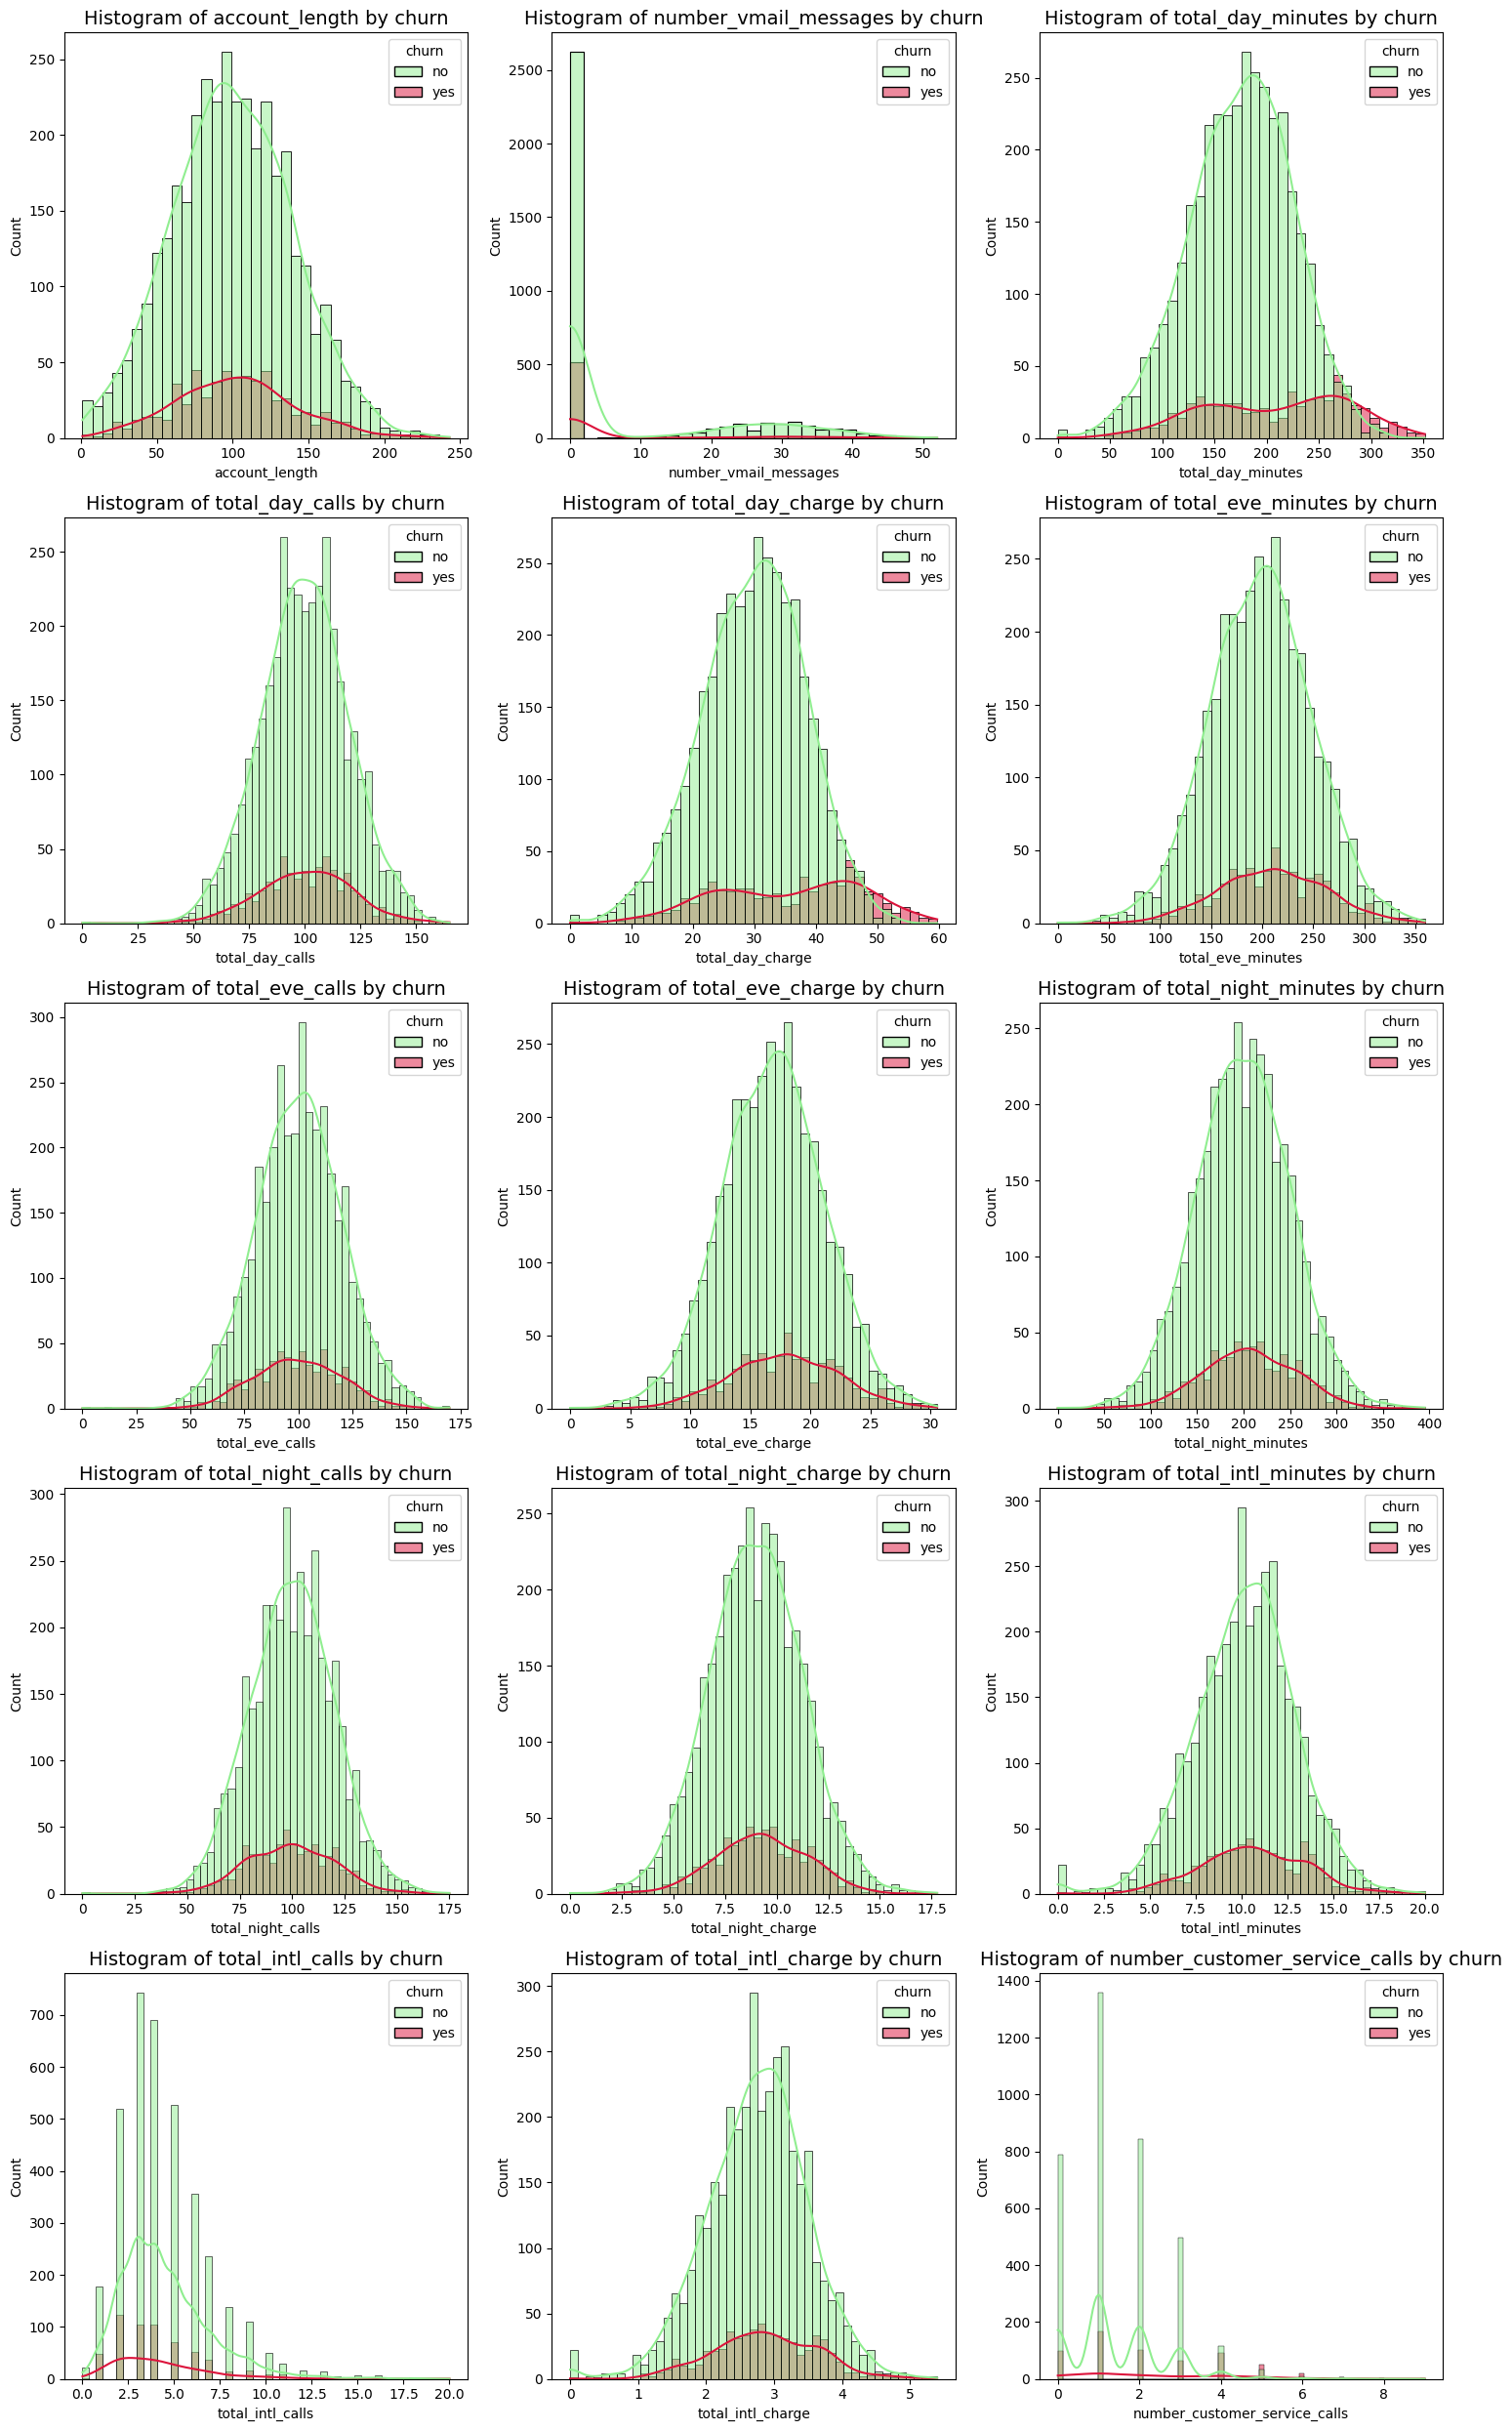

In [ ]:
# Convert 'churn' to categorical if it's not already
df['churn'] = pd.Categorical(df['churn'], categories=['no', 'yes'])

# Select numeric columns
num_cols = df.select_dtypes(include=['int', 'float']).columns

# Determine the number of rows needed (3 columns per row)
n_rows = (len(num_cols) + 1) // 3  # Calculate the number of rows

# Create subplots with 3 columns per row
fig, ax = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize if needed

# Define color palette
color_palette = {'no': 'lightgreen', 'yes': 'crimson'}

for i, col in enumerate(num_cols):
    row = i // 3  # Determine the row index
    col_idx = i % 3  # Determine the column index within the row
    sns.histplot(data=df, x=col, hue='churn', ax=ax[row, col_idx], palette=color_palette, kde=True, fill=True)

    # Set labels and titles
    ax[row, col_idx].set_title(f'Histogram of {col} by churn', fontsize=14)
    ax[row, col_idx].set_xlabel(col)
    ax[row, col_idx].set_ylabel('Count')

# Turn off any unused subplots
for j in range(len(num_cols), n_rows * 2):
    fig.delaxes(ax.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

Based on the histogram visualizing the distribution of some variables related to churn, it can be seen that:

* Account Length, Total Day Minutes & Total Day Charge, Total Eve Minutes & Total Eve Charge, Total Night Minutes & Total Night Charge, and Total International Minutes & Total International Charge parameters do not differ much or it can be said that the distribution is balanced between customers who churn and those who do not.
* Meanwhile, the distribution that is not similar or unbalanced is seen in Number of Voicemail Messages and Number of Customer Service Calls, which can be the main indicators for churn prediction.

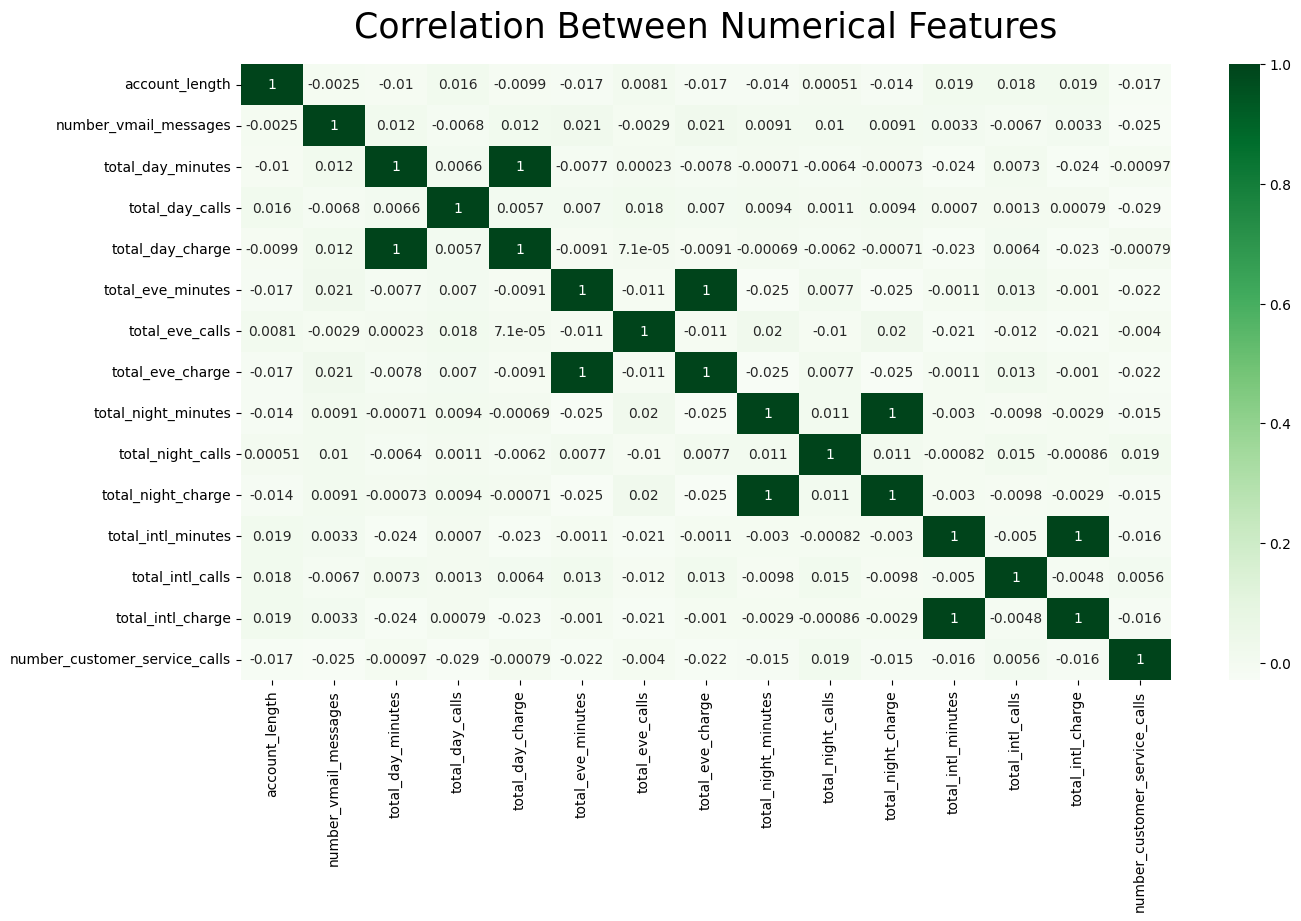

In [ ]:
#Correlation between Numerical Features
table = df[num_cols].corr()
plt.figure(figsize=[15,8])
plt.title("Correlation Between Numerical Features", size=25, pad=20)
sns.heatmap(table, cmap='Greens', annot=True)
plt.show()

* Total Day Minutes & Total Day Charge: These two features have a correlation close to 1 as the total cost of daytime calls (total_day_charge) is calculated directly from the number of minutes of daytime calls (total_day_minutes).
* Total Eve Minutes & Total Eve Charge: The same strong correlation is also seen here, as the cost of an evening call is also calculated from the minutes used during the night.
* Total Night Minutes & Total Night Charge: This follows the same pattern, where the charge is calculated from minutes.
* Total Intl Minutes & Total Intl Charge: This is also a similar example, with international charges being calculated from the minutes used.

Since multiple columns have a strong correlation (1), that is between the charge and minute columns, we will delete one of them would likely result in a more concise and interpretable model without losing any essential information.

In [ ]:
for data in [df]:
    data.drop(columns=['total_day_charge',
                       'total_eve_charge',
                      'total_night_charge',
                      'total_intl_charge'], inplace=True)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107.0,area_code_415,no,yes,26.0,161.6,123.0,195.5,103.0,254.4,103.0,13.7,3.0,1.0,no
1,NJ,137.0,area_code_415,no,no,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0.0,no
2,OH,84.0,area_code_408,yes,no,0.0,299.4,71.0,200.7,88.0,196.9,89.0,6.6,7.0,2.0,no
3,OK,75.0,area_code_415,yes,no,0.0,166.7,113.0,148.3,122.0,186.9,121.0,10.1,3.0,3.0,no
4,MA,121.0,area_code_510,no,yes,24.0,218.2,88.0,200.7,108.0,212.6,118.0,7.5,7.0,3.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83.0,area_code_415,no,no,0.0,188.3,70.0,243.8,88.0,213.7,79.0,10.3,6.0,0.0,no
4246,WV,73.0,area_code_408,no,no,0.0,177.9,89.0,131.2,82.0,186.2,89.0,11.5,6.0,3.0,no
4247,NC,75.0,area_code_408,no,no,0.0,170.7,101.0,193.1,126.0,129.1,104.0,6.9,7.0,1.0,no
4248,HI,50.0,area_code_408,no,yes,40.0,235.7,127.0,223.0,126.0,297.5,116.0,9.9,5.0,2.0,no


In [ ]:
num_cols = df.select_dtypes(include=['int', 'float']).columns

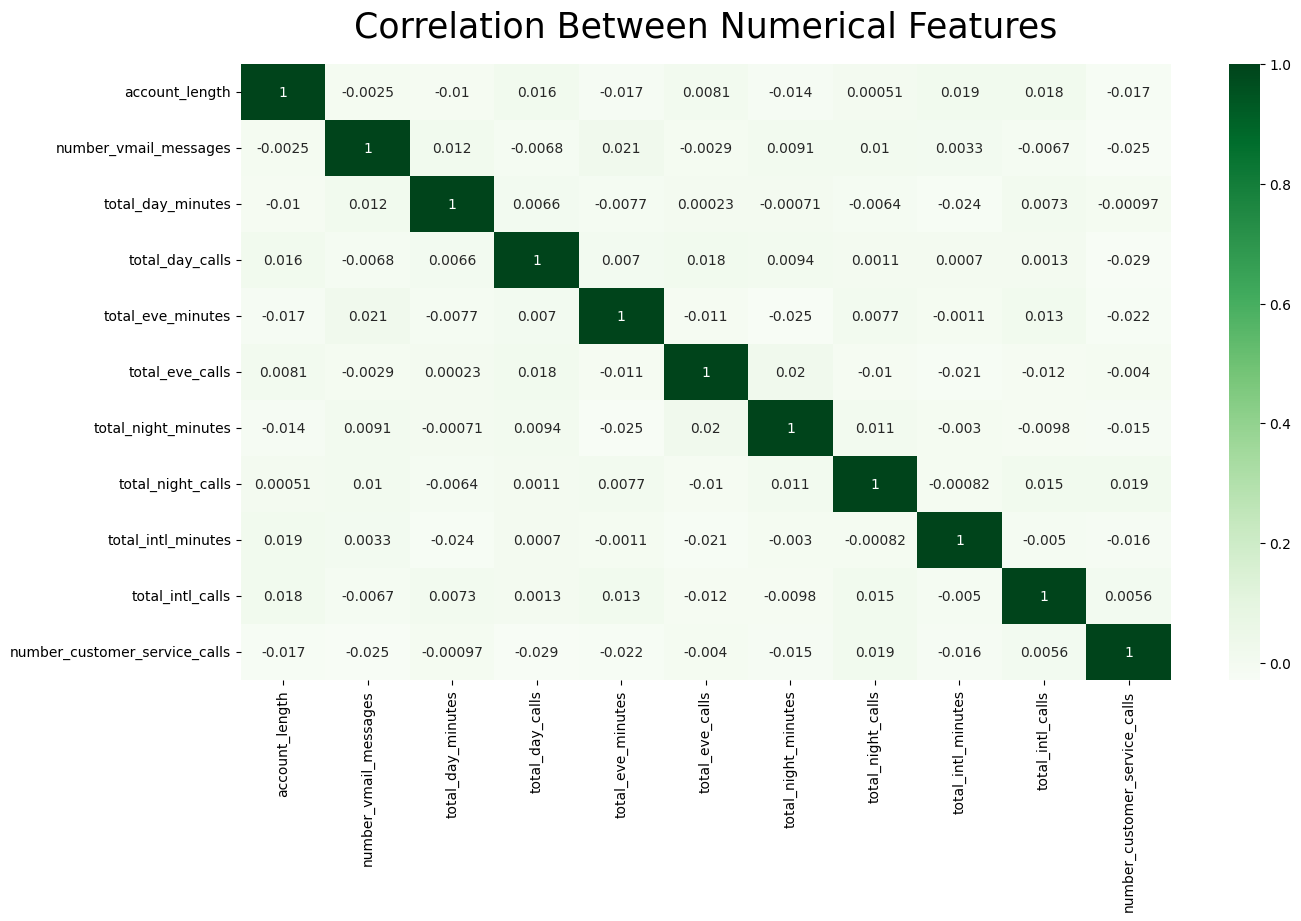

In [ ]:
#Correlation between Numerical Features
table = df[num_cols].corr()
plt.figure(figsize=[15,8])
plt.title("Correlation Between Numerical Features", size=25, pad=20)
sns.heatmap(table, cmap='Greens', annot=True)
plt.show()

In [ ]:
df['state']

,state
0,OH
1,NJ
2,OH
3,OK
4,MA
...,...
4245,MT
4246,WV
4247,NC
4248,HI


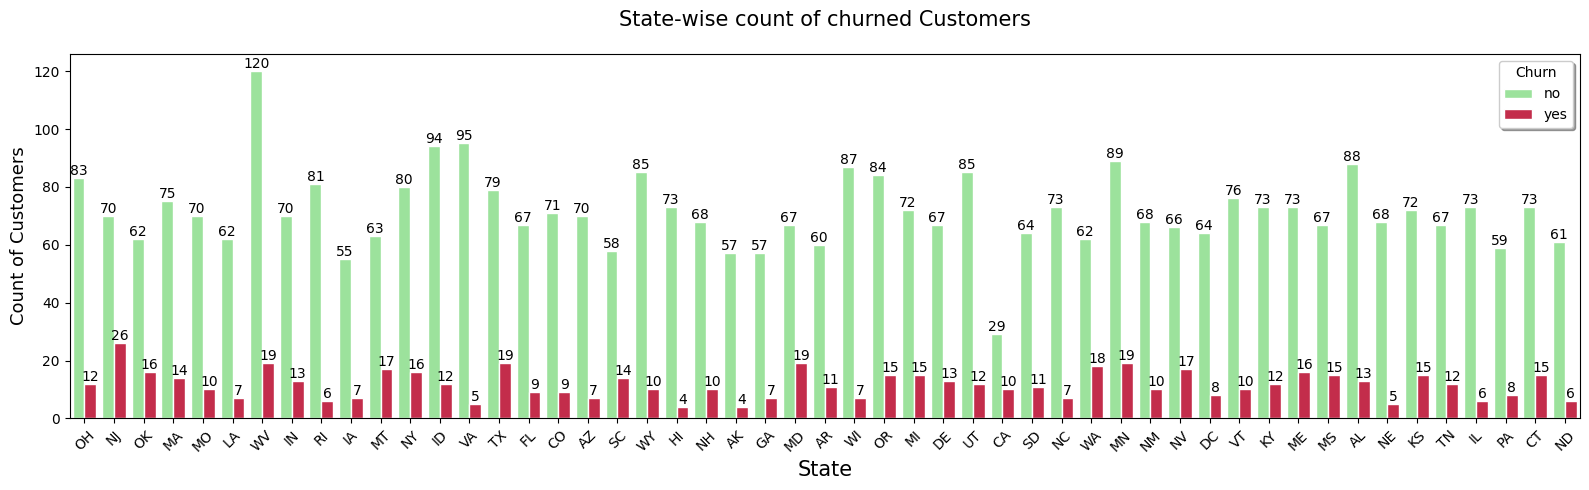

In [ ]:
# Define custom colors for 'churn'
color_palette = {'no': 'lightgreen', 'yes': 'crimson'}

# Create the plot
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(data=df, x='state', hue='churn', palette=color_palette, ax=ax, edgecolor='white')

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Set titles and labels
ax.set_title('State-wise count of churned Customers', pad=20, fontsize=15)
ax.set_xlabel('State', fontsize=15)
ax.set_ylabel('Count of Customers', fontsize=13)
ax.legend(title='Churn', shadow=True)

# Adjust layout
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

Although most states have a relatively small amount of churn compared to the total number of customers, there are states with the most customer churn, e.g. NJ (New Jersey) with 26 churn, followed by the states of MD, MN, TX, WV with 19 churn. This allows the company to focus more on researching the reasons behind the higher churn in the state and further improve future services.

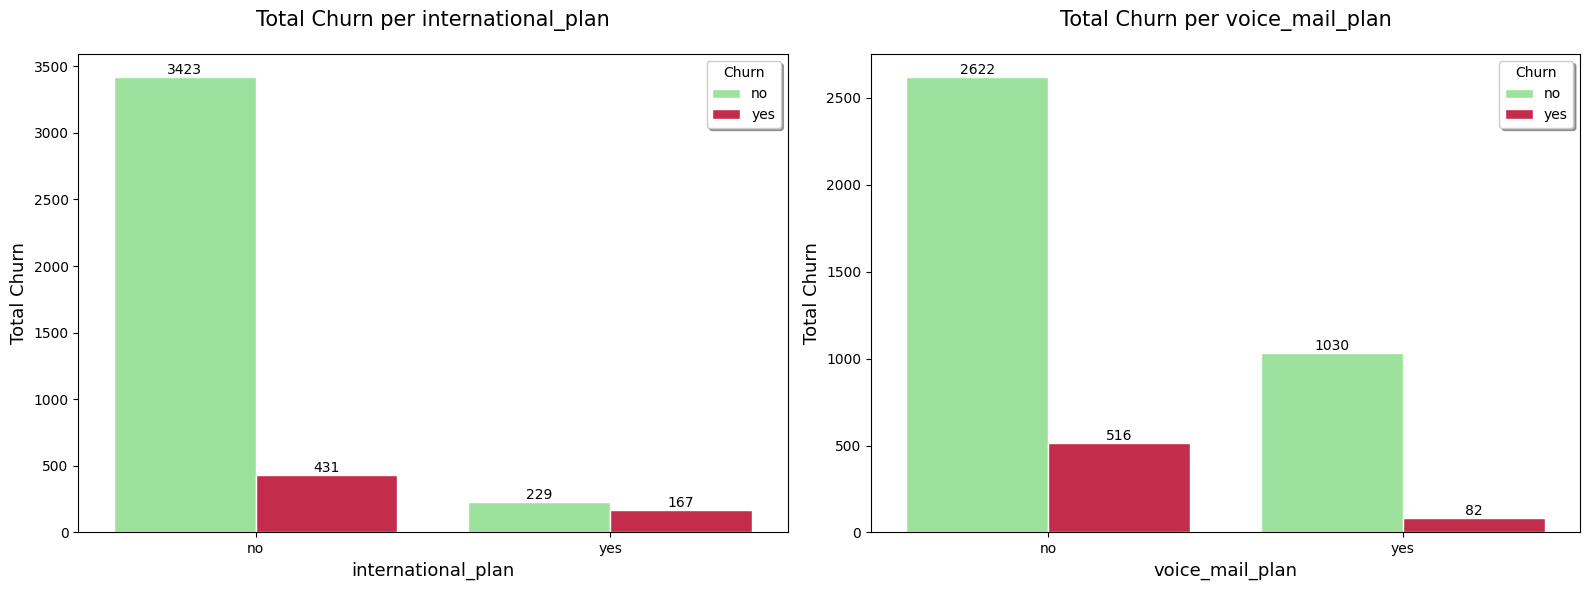

In [ ]:
# List of categorical features to plot
categorical_features = ['international_plan', 'voice_mail_plan']

# Set up the figure with subplots for two features
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Define color palette
colors = ['lightgreen', 'crimson']

# Loop through each categorical feature and create a plot
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue='churn', palette=colors, edgecolor='white', ax=ax[i])

    # Add labels
    for container in ax[i].containers:
        ax[i].bar_label(container, label_type='edge')

    # Set titles and labels
    ax[i].set_title(f'Total Churn per {col}', pad=20, fontsize=15)
    ax[i].set_xlabel(col, fontsize=13)
    ax[i].set_ylabel('Total Churn', fontsize=13)
    ax[i].legend(title='Churn', shadow=True)

# Adjust layout
plt.tight_layout()
plt.show()

* Customers who don’t subscribe to international plans are more likely to not churn (3423 no churn vs. 431 churn). However, for customers who subscribed to the international plan, the churn ratio was relatively higher (167 churns out of 396 total customers).
* Customers who subscribe to voice mail plans are more likely to not churn (1030 no churn vs. 82 churn). However, customers who did not subscribe to a voice mail plan had a higher number of churns (516 churns out of 3138 total customers). This suggests that voice mail plans may contribute to customer retention, although their influence is not as great as others.

<ipython-input-19-5ac81be7102a>:33: UserWarning:

FixedFormatter should only be used together with FixedLocator



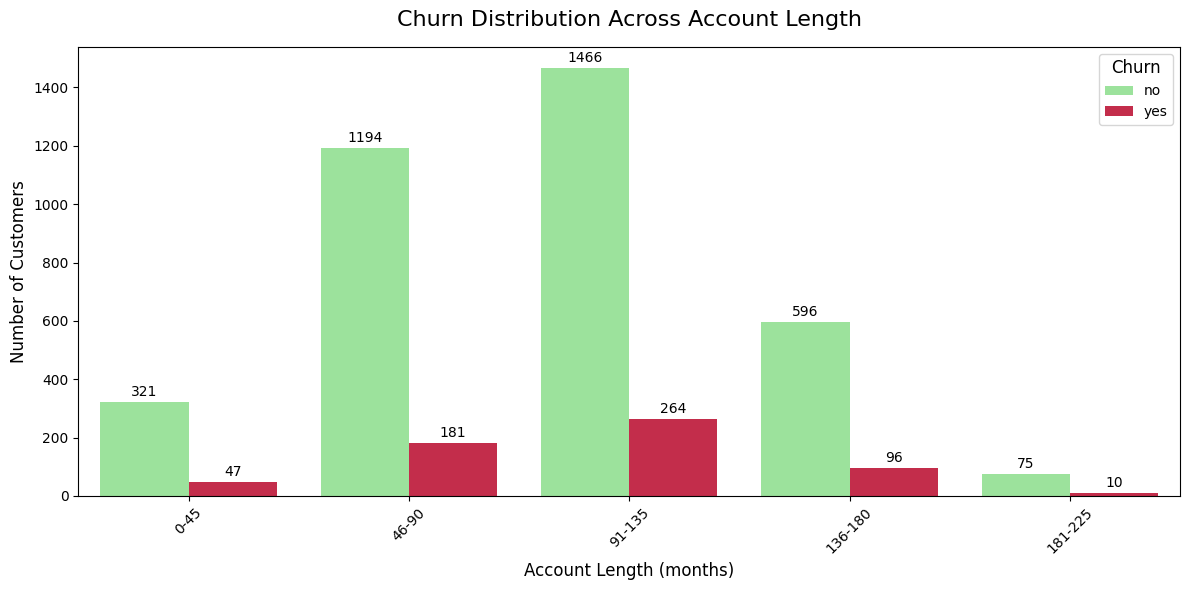

In [ ]:
# Define custom bins and labels
bins = [0, 45, 90, 135, 180, 225]
labels = ['0-45', '46-90', '91-135', '136-180', '181-225']

# Apply the custom bins to the account_length column
df['account_length_bin'] = pd.cut(df['account_length'], bins=bins, labels=labels, right=True)

# Set up the plot
plt.figure(figsize=(12, 6))
custom_palette = {'no': 'lightgreen', 'yes': 'crimson'}  # Customize colors as needed

# Create the count plot
ax = sns.countplot(
    data=df,
    x='account_length_bin',
    hue='churn',
    palette=custom_palette
)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10)

# Customize plot labels and title
ax.set_title('Churn Distribution Across Account Length', fontsize=16, pad=15)
ax.set_xlabel('Account Length (months)', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)

# Set x-axis limits and ensure it starts from 0
ax.set_xlim(left=-0.5, right=len(labels) - 0.5)

# Adjust x-axis tick labels to show rounded bin ranges
ax.set_xticklabels(labels)

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title='Churn', title_fontsize=12, fontsize=10, loc='upper right')

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

* Shorter account durations (0–45 months) have a higher churn ratio relative to the number of customers (47 churn vs 321 no churn). While longer account duration (181–225 months) has a very low churn rate (10 churns out of 85 total subscribers). This suggests that customers who have been subscribed for a long time tend to be more loyal and less prone to churn, while new or recently joined customers are more prone to churn.

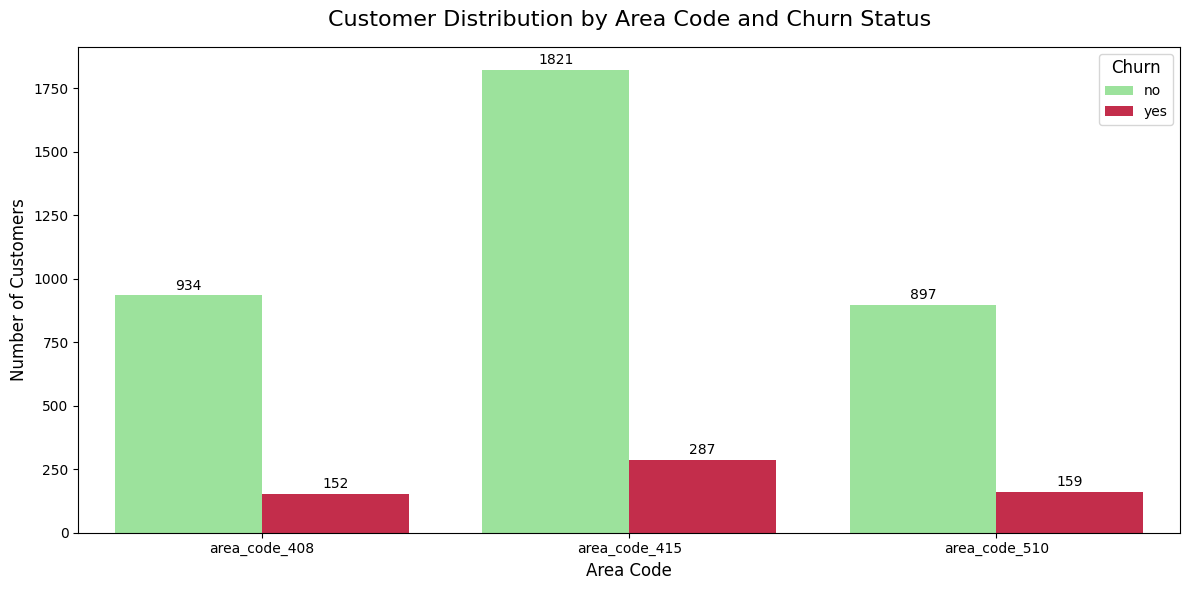

In [ ]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Create the count plot for area_code with churn comparison
sns.countplot(data=df, x='area_code', hue='churn', palette={'no': 'lightgreen', 'yes': 'crimson'})

# Add labels to the bars
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10)

# Customize plot labels and title
ax.set_title('Customer Distribution by Area Code and Churn Status', fontsize=16, pad=15)
ax.set_xlabel('Area Code', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)

# Rotate x-axis labels if necessary
plt.xticks(rotation=0)

# Adjust legend
plt.legend(title='Churn', title_fontsize=12, fontsize=10, loc='upper right')

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

* Area code 415 has the largest number of subscribers, but also has a high churn rate (287 churns out of 2108 total subscribers). And, area code 510 has the fewest users.

<ipython-input-10-dbc02a0328e7>:48: UserWarning:

FixedFormatter should only be used together with FixedLocator



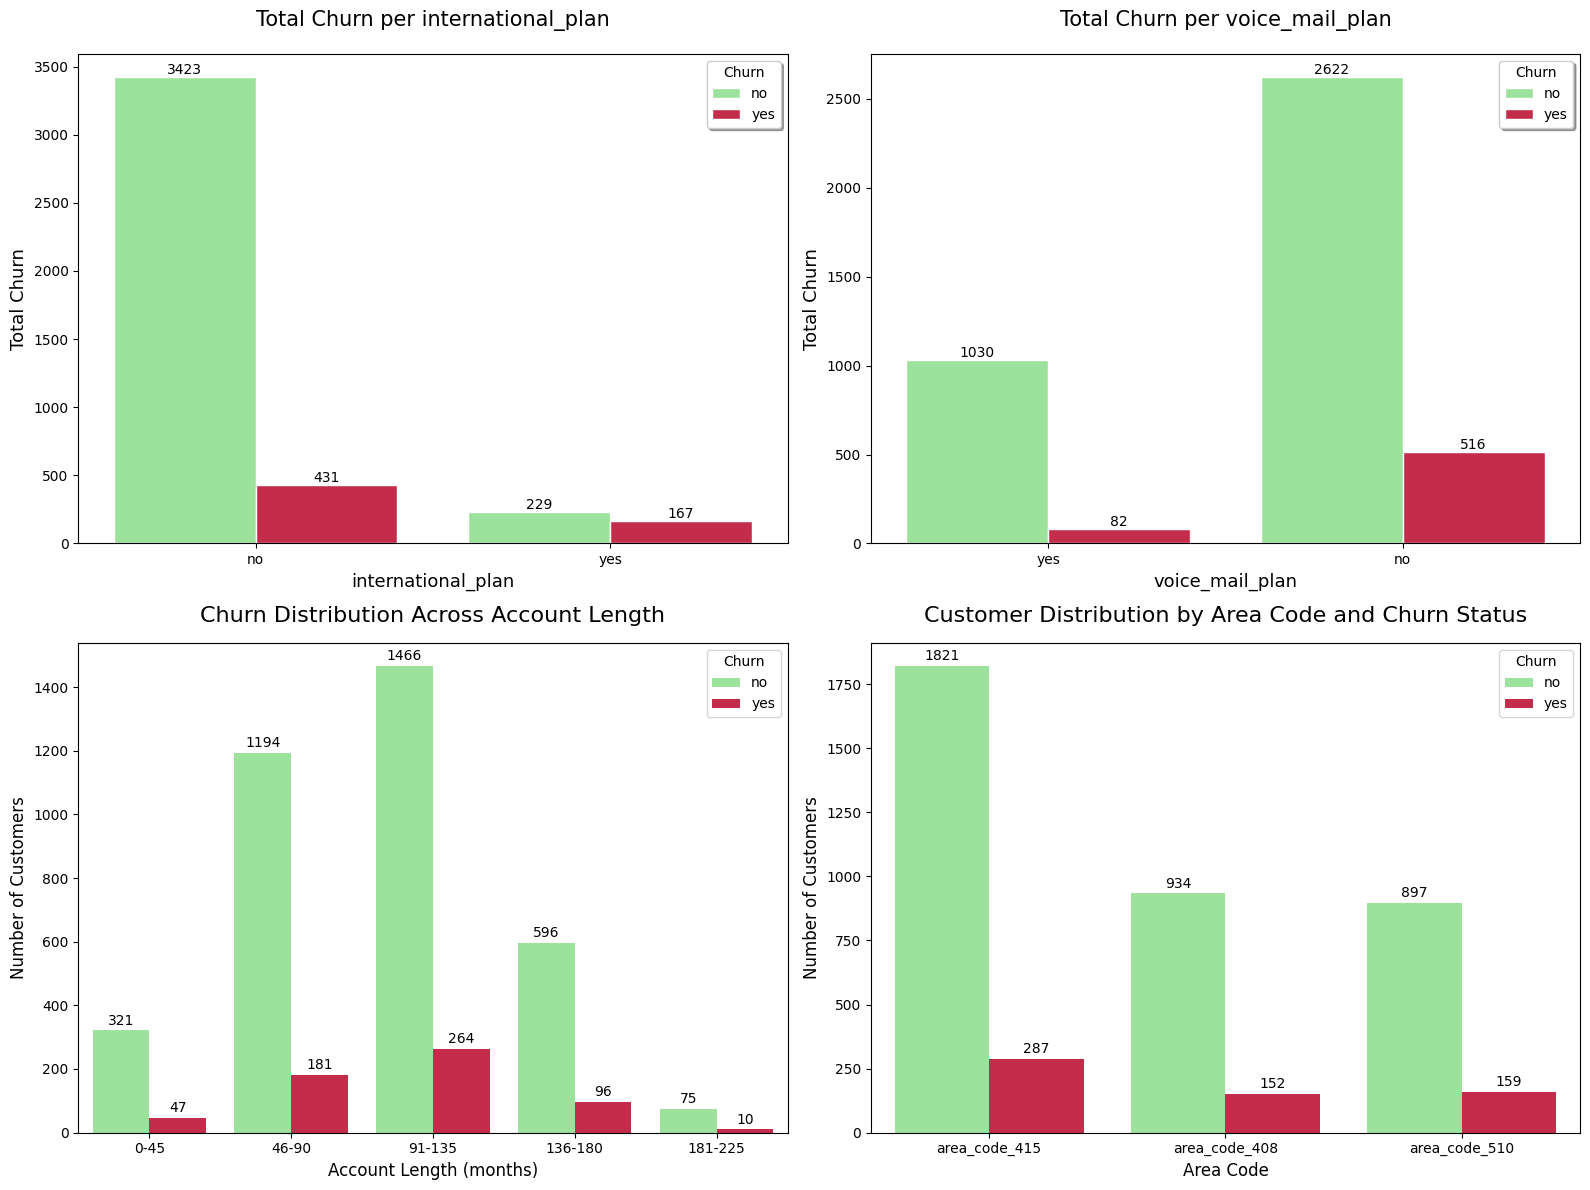

In [ ]:
# List of categorical features to plot
categorical_features = ['international_plan', 'voice_mail_plan']

# Set up the figure with subplots for all four features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns

# Define color palette
colors = ['lightgreen', 'crimson']

# First two plots: International Plan and Voice Mail Plan
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue='churn', palette=colors, edgecolor='white', ax=axes[i // 2, i % 2])

    # Add labels
    for container in axes[i // 2, i % 2].containers:
        axes[i // 2, i % 2].bar_label(container, label_type='edge')

    # Set titles and labels
    axes[i // 2, i % 2].set_title(f'Total Churn per {col}', pad=20, fontsize=15)
    axes[i // 2, i % 2].set_xlabel(col, fontsize=13)
    axes[i // 2, i % 2].set_ylabel('Total Churn', fontsize=13)
    axes[i // 2, i % 2].legend(title='Churn', shadow=True)

# Third plot: Account Length Distribution
# Define custom bins and labels
bins = [0, 45, 90, 135, 180, 225]
labels = ['0-45', '46-90', '91-135', '136-180', '181-225']
df['account_length_bin'] = pd.cut(df['account_length'], bins=bins, labels=labels, right=True)

# Plot the count plot for account_length_bin
sns.countplot(data=df, x='account_length_bin', hue='churn', palette=colors, ax=axes[1, 0])

# Add labels to bars
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10)

# Customize the plot
axes[1, 0].set_title('Churn Distribution Across Account Length', fontsize=16, pad=15)
axes[1, 0].set_xlabel('Account Length (months)', fontsize=12)
axes[1, 0].set_ylabel('Number of Customers', fontsize=12)
axes[1, 0].set_xticklabels(labels)
axes[1, 0].legend(title='Churn', loc='upper right')

# Fourth plot: Area Code Distribution
sns.countplot(data=df, x='area_code', hue='churn', palette=colors, ax=axes[1, 1])

# Add labels to bars
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10)

# Customize the plot
axes[1, 1].set_title('Customer Distribution by Area Code and Churn Status', fontsize=16, pad=15)
axes[1, 1].set_xlabel('Area Code', fontsize=12)
axes[1, 1].set_ylabel('Number of Customers', fontsize=12)
axes[1, 1].legend(title='Churn', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

### Feature Engineering

In [ ]:
for data in [df]:
    data['voice_mail_plan'] = data['voice_mail_plan'].map({'yes': 1, 'no': 0})
    data['international_plan'] = data['international_plan'].map({'yes': 1, 'no': 0})
    data.drop(columns= ['state', 'area_code'], inplace= True)

df['churn'] = df['churn'].map({'yes': 1, 'no': 0})
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,107.0,0,1,26.0,161.6,123.0,195.5,103.0,254.4,103.0,13.7,3.0,1.0,0
1,137.0,0,0,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0.0,0
2,84.0,1,0,0.0,299.4,71.0,200.7,88.0,196.9,89.0,6.6,7.0,2.0,0
3,75.0,1,0,0.0,166.7,113.0,148.3,122.0,186.9,121.0,10.1,3.0,3.0,0
4,121.0,0,1,24.0,218.2,88.0,200.7,108.0,212.6,118.0,7.5,7.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83.0,0,0,0.0,188.3,70.0,243.8,88.0,213.7,79.0,10.3,6.0,0.0,0
4246,73.0,0,0,0.0,177.9,89.0,131.2,82.0,186.2,89.0,11.5,6.0,3.0,0
4247,75.0,0,0,0.0,170.7,101.0,193.1,126.0,129.1,104.0,6.9,7.0,1.0,0
4248,50.0,0,1,40.0,235.7,127.0,223.0,126.0,297.5,116.0,9.9,5.0,2.0,0


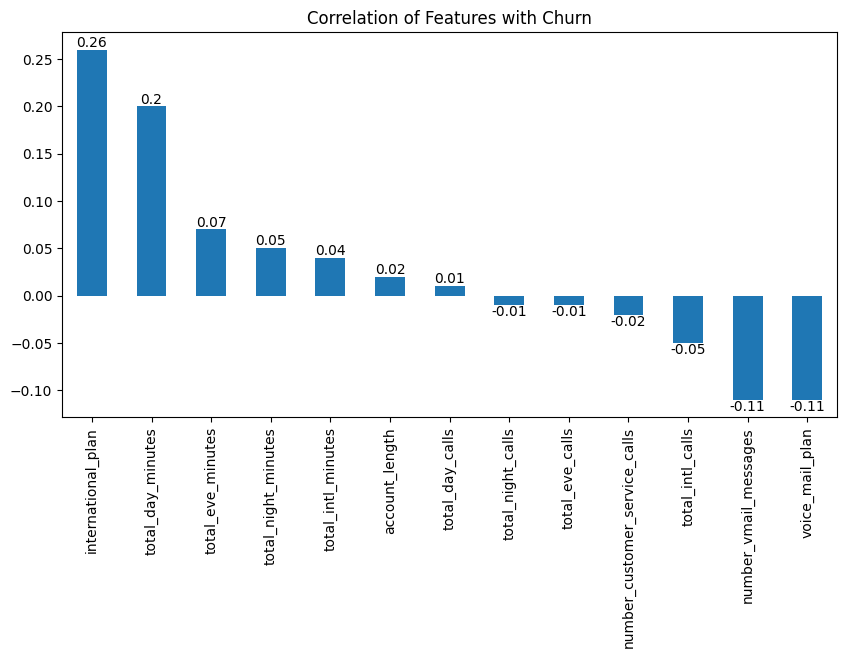

In [ ]:
#Correlation of Features with Churn
p = round(df.corr()['churn'].sort_values(ascending=False)[1:],2).plot(kind='bar', figsize=(10,5))
p.bar_label(p.containers[0])
plt.title('Correlation of Features with Churn')
plt.show()

* International Plan is the strongest indicator of churn. This may be because customers who have this plan feel the international service does not meet their expectations, or they find a better alternative.
* Total Day Minutes is also a strong indicator, which may indicate dissatisfaction in customers who use the service more frequently during the day.